In [1]:
!pip install statsbombpy --q
!pip install mplsoccer --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 KB 2.1 MB/s eta 0:00:00


In [2]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.patches import Arc
import seaborn as sns
from tkinter import *

In [4]:
#Instanciando a base de competições
cmp = sb.competitions()

In [7]:
list(cmp['competition_name'].unique())

['Champions League',
 "FA Women's Super League",
 'FIFA World Cup',
 'Indian Super league',
 'La Liga',
 'NWSL',
 'Premier League',
 'UEFA Euro',
 "UEFA Women's Euro",
 "Women's World Cup"]

In [20]:
list(cmp[cmp['competition_name'] == 'La Liga'].season_name.unique())

['2020/2021',
 '2019/2020',
 '2018/2019',
 '2017/2018',
 '2016/2017',
 '2015/2016',
 '2014/2015',
 '2013/2014',
 '2012/2013',
 '2011/2012',
 '2010/2011',
 '2009/2010',
 '2008/2009',
 '2007/2008',
 '2006/2007',
 '2005/2006',
 '2004/2005']

In [21]:
#Nossas variáveis que vamos definir para buscar as informações na base do Statsbomb
season = '2020/2021'
competition ='La Liga'

In [22]:
#Trazendo o ID da competição e da temporada dentro do StatsBomb
comp_id =  list(cmp[(cmp['season_name'] == season) & (cmp['competition_name'] == competition)].competition_id)
print(comp_id)
sea_id =  list(cmp[(cmp['season_name'] == season) & (cmp['competition_name'] == competition)].season_id)
print(sea_id)

[11]
[90]


In [23]:
#Trazendo todas as partidas da competição
matches = sb.matches(competition_id=comp_id[0], season_id=sea_id[0])
matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3773457,2021-05-16,18:30:00.000,Spain - La Liga,2020/2021,Barcelona,Celta Vigo,1,2,available,...,2022-08-04T12:00,37,Regular Season,Spotify Camp Nou,NaN,Ronald Koeman,Eduardo Germán Coudet,1.1.0,2,2
1,3773631,2021-02-07,21:00:00.000,Spain - La Liga,2020/2021,Real Betis,Barcelona,2,3,available,...,2022-08-04T12:00,22,Regular Season,Estadio Benito Villamarín,NaN,Manuel Luis Pellegrini Ripamonti,Ronald Koeman,1.1.0,2,2
2,3773665,2021-03-06,21:00:00.000,Spain - La Liga,2020/2021,Osasuna,Barcelona,0,2,available,...,2022-08-04T12:00,26,Regular Season,Estadio El Sadar,Guillermo Cuadra Fernández,Jagoba Arrasate Elustondo,Ronald Koeman,1.1.0,2,2
3,3773497,2021-04-10,21:00:00.000,Spain - La Liga,2020/2021,Real Madrid,Barcelona,2,1,available,...,2022-08-04T12:00,30,Regular Season,Estadio Alfredo Di Stéfano,Jesús Gil Manzano,Zinédine Zidane,Ronald Koeman,1.1.0,2,2
4,3773660,2020-12-13,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Levante,1,0,available,...,2022-08-04T12:00,13,Regular Season,Spotify Camp Nou,Ricardo De Burgos Bengoetxea,Ronald Koeman,Francisco José López Fernández,1.1.0,2,2


In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               35 non-null     int64 
 1   match_date             35 non-null     object
 2   kick_off               35 non-null     object
 3   competition            35 non-null     object
 4   season                 35 non-null     object
 5   home_team              35 non-null     object
 6   away_team              35 non-null     object
 7   home_score             35 non-null     int64 
 8   away_score             35 non-null     int64 
 9   match_status           35 non-null     object
 10  match_status_360       35 non-null     object
 11  last_updated           35 non-null     object
 12  last_updated_360       35 non-null     object
 13  match_week             35 non-null     int64 
 14  competition_stage      35 non-null     object
 15  stadium                35

In [25]:
#Vendo quais times estão na base
print(list(matches['home_team'].unique()))

['Barcelona', 'Real Betis', 'Osasuna', 'Real Madrid', 'Celta Vigo', 'Huesca', 'Deportivo Alavés', 'Granada', 'Getafe', 'Atlético Madrid', 'Levante', 'Valencia', 'Real Sociedad', 'Real Valladolid', 'Cádiz', 'Athletic Club', 'Sevilla', 'Villarreal']


In [26]:
#Vamos escolher o Real Madrid e trazer todas as partidas deles em casa e fora!
team = 'Real Madrid'
team_game = matches[(matches['home_team'] == team) | (matches['away_team'] == team)]

In [30]:
#Vamos analisar uma partida em específico. Vamos analisar Barça e Real Madrid, tendo o Real como mandante!
#Vamos descobrir qual o ID da partida dentro do StatsBomb

id_match = list(team_game[team_game['away_team'] == 'Barcelona'].match_id)
print(id_match)

[3773497]


In [34]:
#Agora, temos que descobrir quais jogadores jogaram a partida! Para isso, temos que baixar a base "LineUps" do StatsBomb e passar o "id_match" como referência!

lineup = sb.lineups(match_id=id_match[0])[team]

In [35]:
lineup

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3163,Mariano Díaz Mejía,Mariano Díaz,24,Dominican Republic,[],"[{'position_id': 23, 'position': 'Center Forwa..."
1,3509,Thibaut Courtois,None,1,Belgium,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
2,3804,Ferland Mendy,None,23,France,[],"[{'position_id': 6, 'position': 'Left Back', '..."
3,4926,Francisco Román Alarcón Suárez,Isco,22,Spain,[],"[{'position_id': 15, 'position': 'Left Center ..."
4,5200,Lucas Vázquez Iglesias,Lucas Vázquez,17,Spain,[],"[{'position_id': 2, 'position': 'Right Back', ..."
5,5202,José Ignacio Fernández Iglesias,Nacho,6,Spain,"[{'time': '67:55', 'card_type': 'Yellow Card',...","[{'position_id': 5, 'position': 'Left Center B..."
6,5463,Luka Modrić,None,10,Croatia,[],"[{'position_id': 13, 'position': 'Right Center..."
7,5539,Carlos Henrique Casimiro,Casemiro,14,Brazil,"[{'time': '88:24', 'card_type': 'Yellow Card',...","[{'position_id': 10, 'position': 'Center Defen..."
8,5552,Marcelo Vieira da Silva Júnior,Marcelo,12,Brazil,[],"[{'position_id': 16, 'position': 'Left Midfiel..."
9,5574,Toni Kroos,None,8,Germany,[],"[{'position_id': 15, 'position': 'Left Center ..."


In [36]:
#Aqui, queremos descobrir qual o mapa de calor do Tony Kroos na partida. Então temos que pegar qual  "ID" dele dentro do StatsBomb!

id_tony = list(lineup[lineup['player_name']=='Toni Kroos'].player_id)
id_tony

[5574]

In [43]:
#Agora que temos o "ID" do Tony Kross, para sabermos os passes dele ao longo do jogo, temos que baixar a base "events" do StatsBomb e pegar todos os eventos referentes a passes.



df_events = sb.events(match_id = id_match[0])

#Pegando os eventos de passes do Tony Kross no jogo
df_pass = df_events.loc[(df_events['type'] == 'Pass') & (df_events['player_id'] == id_tony[0])]

df_pass.head()

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:17.685,Pass,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:02:55.643,Pass,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:03:22.612,Pass,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:03:52.176,Pass,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:06:29.054,Pass,NaN


In [44]:
#Não se assuste! A base terá mesmo muitos nulos, pois nem todos os eventos ocorrerão ao longo do jogo.
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 16 to 909
Data columns (total 91 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bad_behaviour_card              0 non-null      object 
 1   ball_receipt_outcome            0 non-null      object 
 2   ball_recovery_offensive         0 non-null      object 
 3   ball_recovery_recovery_failure  0 non-null      object 
 4   block_deflection                0 non-null      object 
 5   block_offensive                 0 non-null      object 
 6   carry_end_location              0 non-null      object 
 7   clearance_aerial_won            0 non-null      object 
 8   clearance_body_part             0 non-null      object 
 9   clearance_head                  0 non-null      object 
 10  clearance_left_foot             0 non-null      object 
 11  clearance_right_foot            0 non-null      object 
 12  counterpress                    0 no

In [50]:
#Para criar o mapa de calor, precisaremos da localização X e Y no campo aonde o passe foi dado. Para isso, usaremos o campo "Location" na base, e dividi-lo em 2 colunas

location_xy  = df_pass.location.apply(pd.Series)
location_xy.columns = ['X','Y']
location_xy.reset_index(inplace = True)
del location_xy['index']
location_xy.head()

,X,Y
0,86.6,60.3
1,43.5,22.6
2,21.8,36.9
3,33.0,0.9
4,42.2,23.1


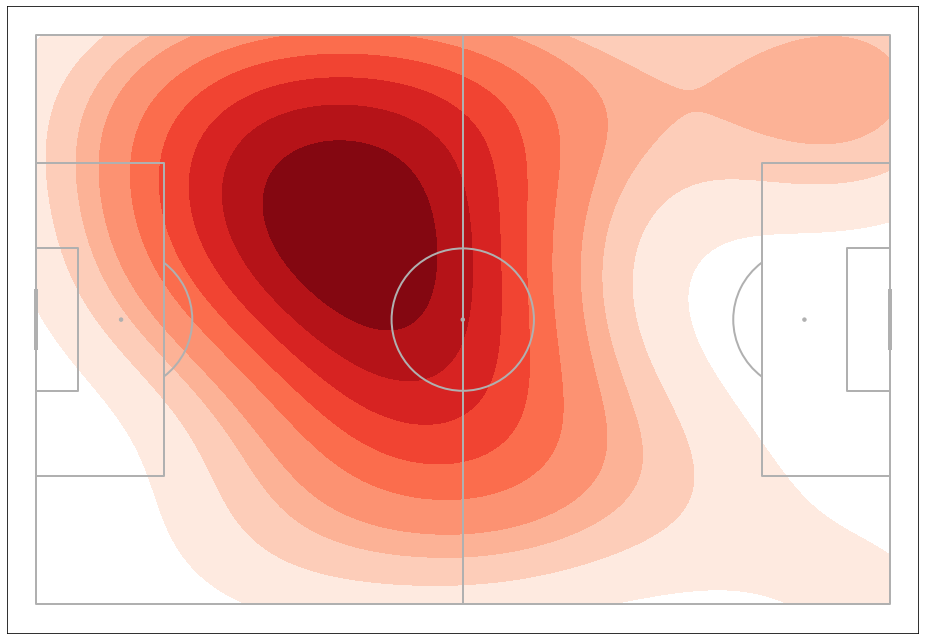

In [51]:
#Agora, vamos começar a desenhar nosso mapa de calor! Para isso, vamos usar o atributo "Pitch" da biblioteca "mplsoccer"

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', axis = True)


#Determinando o tamanho da figura
fig, ax = pitch.draw(figsize=(16, 9))


kde = pitch.kdeplot(location_xy['X'],location_xy['Y'], ax=ax,fill=True, levels=10,cut=10, cmap='Reds')

#### Primeiramente , passamos a localização em X e depois em Y, e instanciamos a variável que contém as dimensões da figura. */
   ## A variável "Level" mostra quantas camadas seu mapa terá. Quanto mais camadas, maior o detalhe do mapa.
   ## A variável "cut" define a nitidez com que se enxerga os níveis
